# News reader

over the last 10 days, I have scrapped the headlines of the news related to technology and science from verious magazine, newspapers, and websites all over the world.

## The aim:
to collect an up to date dataset of the recent technology news from different resources, and the applying some NLP techniques in order to analyze to most common trend of technology - specifically AI or data science-and which newspaper or magazine is talking about that the most.
the analysis depends on a pre-defined set of well-known technological keywords collected from the Guardian website and the job description in Indeed platform.


In [1]:
import urllib 
from bs4 import BeautifulSoup   
import subprocess
import os
from time import sleep
import re
from datetime import date
import pandas as pd
import requests
from newspaper import Article

# Scrap the data:

the data was acquired from many websites such as: MIT innovation, linux magazine, BBC technology, reuters tech, and google news.
the data is scrspped as html file, parsed using BeautifulSoup, and then the relevant information is extracted and stored in csv file.
 
Depending on the accessibility of each website, sometimes the urllib is used and sometimes requests, i.e the request using urllib is forbidden in some website such as robotics.

In [ ]:
# data acquisition from inshort 
data_inshort = []
html_inshort = urllib.request.urlopen("https://inshorts.com/en/read/technology")  
soup_inshort = BeautifulSoup(html_inshort.read(),"html.parser") 
news_inshort = soup_inshort.find_all('div', attrs={'itemprop':'articleBody'}) 
for item in news_inshort:
    st=item.get_text()
    data_inshort.append({
        'text':st,
        'newspaper':'inshort',
        'country':'india',
        'date': str(date.today()),
        'auhtor':'unkown',

    })
#data_inshort    

In [ ]:
df = pd.DataFrame(data_inshort)
df

In [ ]:
# data acquisition from linux magazine
data_linux = []
html_linux = urllib.request.urlopen("https://www.linux-magazine.com/")  
soup_linux = BeautifulSoup(html_linux.read(),"html.parser") 
news_linux = soup_linux.find_all('p')
for p in news_linux:
    data_linux.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'linux',
        'country':'USA',
        'date': str(date.today()),
        'auhtor':'unkown',

    })
#data_linux

In [ ]:
#df_linux
df = pd.concat([df,pd.DataFrame(data_linux)], ignore_index=True)
df

In [ ]:
## bbc news tech 
data_bbc = []
html_tech = requests.get("https://www.bbc.com/news/technology") 
soup_tech = BeautifulSoup(html_tech.text, 'html.parser') 
news_tech = soup_tech.find_all('p', { 'class': 'gs-c-promo-summary' })
for p in news_tech:
    data_bbc.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'bbc_tech',
        'country':'Uk',
        'date': str(date.today()),
        'auhtor':'unkown',

    })
    



In [ ]:
# bbc news bussiness
html_bussiness = requests.get("https://www.bbc.com/news/business") 
soup_bussiness = BeautifulSoup(html_bussiness.text, 'html.parser') 
news_bussiness = soup_bussiness.find_all('p', { 'class': 'gs-c-promo-summary' })
for p in news_bussiness:
    data_bbc.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'bbc_bussiness',
        'country':'Uk',
        'date': str(date.today()),
        'auhtor':'unkown',

    })
#data_bbc

In [ ]:
df = pd.concat([df,pd.DataFrame(data_bbc)], ignore_index=True)
df

In [ ]:
### cnet worldwide
data_cnet=[]
html_cnet = urllib.request.urlopen("https://www.cnet.com/topics/sci-tech/")  
news_cnet = BeautifulSoup(html_cnet.read(),"html.parser").find_all('p')
for item in news_cnet:
    data_cnet.append({
        'text':item.text.strip(),
        #'auhtor':'unkown',
        'newspaper':'cnet',
        'country':'worldwide',
        'date': str(date.today()),
        'auhtor':'unkown',

    })
#data_cnet

In [ ]:
df = pd.concat([df,pd.DataFrame(data_cnet)], ignore_index=True)
df

In [ ]:
## Abc australia
data_abc=[]
html_abc= requests.get("https://www.abc.net.au/news/technology/") 
soup_abc = BeautifulSoup(html_abc.text, 'html.parser') 
news_abc = soup_abc.find_all('p', {'class':''})
for p in news_abc:
    data_abc.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'abc',
        'country':'australia',
        'date': str(date.today()),
        'auhtor':'unkown',

    })
#data_abc

In [ ]:
df = pd.concat([df,pd.DataFrame(data_abc)], ignore_index=True)
df

In [ ]:
data_robotics = []
html_robotics = requests.get("https://robotics.sciencemag.org/")  
news_robotics = BeautifulSoup(html_robotics.text,"html.parser").find_all('p',{'class':''})
for p in news_robotics[1:-2]:
    data_robotics.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'robotics',
        'country':'worlwide',
        'date': str(date.today()),
        'auhtor':'unkown',

    })
#data_robotics

In [ ]:
df = pd.concat([df,pd.DataFrame(data_robotics)], ignore_index=True)
df

In [ ]:
#MIT technology innovation
data_MIT = []
html_MIT = requests.get('https://www.technologyreview.com/magazines/the-innovation-issue/')  
news_MIT = BeautifulSoup(html_MIT.text,"html.parser").find_all('p')
for p in news_MIT:
    data_MIT.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'MIT',
        'country':'USA',
        'date': str(date.today()),
        'auhtor':'unkown',

    })
#data_MIT

In [ ]:
df = pd.concat([df,pd.DataFrame(data_MIT)], ignore_index=True)
df

In [ ]:
# gadgets data
data_gadgets = []
html_gadgets = requests.get('https://gadgets.ndtv.com/news')  
news_gadgets = BeautifulSoup(html_gadgets.text,"html.parser").find_all('span',{'class':'news_listing'})
for p in news_gadgets:
    data_gadgets.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'gadgets',
        'country':'india',
        'date': str(date.today()),
        'auhtor':'unkown',

    })
#data_gadgets

In [ ]:
df = pd.concat([df,pd.DataFrame(data_gadgets)], ignore_index=True)
df

In [ ]:
# scitechdaily
data_scitechdaily = []
html_scitechdaily = requests.get('https://scitechdaily.com/news/technology/')  
news_scitechdaily = BeautifulSoup(html_scitechdaily.text,"html.parser").find_all('p', {'class':''})
for p in news_scitechdaily[1:]:
    data_scitechdaily.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'scitechdaily',
        'country':'USA',
        'date': str(date.today()),
        'auhtor':'unkown'

    })
#data_scitechdaily

In [ ]:
df = pd.concat([df,pd.DataFrame(data_scitechdaily)], ignore_index=True)
df

In [ ]:
data_reuters = []
html_reuters = requests.get('https://www.reuters.com/news/archive/technologyNews')  
news_reuters = BeautifulSoup(html_reuters.text,"html.parser").find_all('p', {'class':''})
for p in news_reuters[:-2]:
    data_reuters.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'reuters',
        'country':'USA',
        'date': str(date.today()),
        'auhtor':'unkown'

    })
#data_reuters

In [ ]:
df = pd.concat([df,pd.DataFrame(data_reuters)], ignore_index=True)
df

In [ ]:
# yahoo tech - credential information is used
data_yahoo = []
login_url = 'https://login.yahoo.com/?.intl=in&src=noSrc&intl=en&specId=yidReg&done=https%3A%2F%2Fwww.yahoo.com&nr=1'
credential_data = {
    'username': 'username',
    'password': 'password'
}


s = requests.Session()
response = requests.post(login_url , credential_data)
html_yahoo= s.get('https://uk.finance.yahoo.com/')
news_yahoo = BeautifulSoup(html_yahoo.text, 'html.parser').find_all('p')
for p in news_yahoo[:]:
    data_yahoo.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'yahoo',
        'country':'UK',
        'date': str(date.today()),
        'auhtor':'unkown'

    })
#data_yahoo


In [ ]:
df = pd.concat([df,pd.DataFrame(data_yahoo)], ignore_index=True)
df

In [ ]:
# google news AI canada
data_google_ai = []
html_google = requests.get('https://news.google.com/topics/CAAqJggKIiBDQkFTRWdvSUwyMHZNRGRqTVhZU0FtVnVHZ0pEUVNnQVAB/sections/CAQiR0NCQVNMd29JTDIwdk1EZGpNWFlTQldWdUxVZENHZ0pEUVNJTkNBUWFDUW9ITDIwdk1HMXJlaW9KRWdjdmJTOHdiV3Q2S0FBKi4IACoqCAoiJENCQVNGUW9JTDIwdk1EZGpNWFlTQldWdUxVZENHZ0pEUVNnQVABUAE?hl=en-CA&gl=CA&ceid=CA%3Aen')
news_google = BeautifulSoup(html_google.text,"html.parser").find_all('a', {'class':'VDXfz'})

for p in news_google[:]:
    try:
        headline_url = 'https://news.google.com'+p.get('href')[1:]
        article = Article(headline_url)
        article.download()
        article.parse()
        print(article.title.strip())
        print(str(article.publish_date.date()))
        print(str(article.title.strip()))
        
        try:
            d =str(article.publish_date.date())
        except:
            d=''
        try:
            auth = ' '.join(article.authors)
        except:
            auth=''
        data_google_ai.append({
            'text':str(article.title.strip()),
            #'auhtor':'unkown',
            'newspaper':'google_news',
            'country':'canada',
            'date': d,     
            'auhtor':auth,})
    except:
        pass
#data_google

In [ ]:
df = pd.concat([df,pd.DataFrame(data_google_ai)], ignore_index=True)
df

In [ ]:
# google news computing canada
data_google_latest = []
html_google = requests.get('https://news.google.com/topics/CAAqJggKIiBDQkFTRWdvSUwyMHZNRGRqTVhZU0FtVnVHZ0pEUVNnQVAB?hl=en-CA&gl=CA&ceid=CA%3Aen')

news_google = BeautifulSoup(html_google.text,"html.parser").find_all('a', {'class':'VDXfz'})

for p in news_google[:]:
    try:
        headline_url = 'https://news.google.com'+p.get('href')[1:]
        article = Article(headline_url)
        article.download()
        article.parse()
        print(article.title.strip())
        print(str(article.publish_date.date()))
        print(str(article.title.strip()))
        
        try:
            d =str(article.publish_date.date())
        except:
            d=''
        try:
            auth = ' '.join(article.authors)
        except:
            auth=''
        data_google_latest.append({
            'text':str(article.title.strip()),
            #'auhtor':'unkown',
            'newspaper':'google_news',
            'country':'canada',
            'date': d,     
            'auhtor':auth,})
    except:
        pass
#data_google

In [ ]:
df = pd.concat([df,pd.DataFrame(data_google_latest)], ignore_index=True)
df

In [ ]:
# import the last version of the dataset ( security reason)
df_yesterday=pd.read_csv('data.csv')
df_yesterday


In [ ]:
# export the current data to the csv file
df.to_csv('data.csv',mode ='a', header=False, index=False)

In [ ]:
# the up-to-date dataset
df_new=pd.read_csv('data.csv')
df_new


In [ ]:
# there are a lot of duplicates in the text as some websites do not update their db every day
df_new.describe()

# Getting a set of technological keywords:
this is the first set of keywords which will be used later, it is scrapped from the Guardian website

In [ ]:
# scrapping technological keywords from the guardian website (the most used ones)

html_guard = requests.get('https://www.theguardian.com/technology/list/alltechnologykeywords#keyword7') 
soup_kw = BeautifulSoup(html_guard.text,"html.parser").find_all('a')

In [ ]:
for i,p in enumerate(soup_kw[82:511]+soup_kw[537:547]):
    print(str(i)+ ' '+ str(p.get_text().strip()))

In [ ]:
tech_keywords = ['keyword']
for p in soup_kw[82:511]+soup_kw[537:547]:
    tech_keywords.append(p.get_text().strip())

In [ ]:
df_keywords=pd.DataFrame(tech_keywords)
df_keywords.rename(columns={'':'keywords'},inplace=True)
df_keywords.head(20)

In [ ]:
df_keywords.to_csv('keywords.csv',mode ='a', header=False, index=False)

In [ ]:
## the stored csv file
df_kw = pd.read_csv('keywords.csv')
df_kw

# Data Cleaning

In [2]:
import re
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('data.csv')
df.head()

,text,newspaper,country,date,auhtor
0,"Twitter has said its users can have an ""Edit"" ...",inshort,india,2020-07-05,NaN
1,"A US Navy veteran, who was hired by Facebook t...",inshort,india,2020-07-05,NaN
2,Twitter's engineering division has said the co...,inshort,india,2020-07-05,NaN
3,Reliance Industries on Friday announced that I...,inshort,india,2020-07-05,NaN
4,Some Tesla staff and labour activists have acc...,inshort,india,2020-07-05,NaN


In [4]:
# rename the column name
df.rename(columns={'auhtor':'author'}, inplace=True)
df.head()

,text,newspaper,country,date,author
0,"Twitter has said its users can have an ""Edit"" ...",inshort,india,2020-07-05,NaN
1,"A US Navy veteran, who was hired by Facebook t...",inshort,india,2020-07-05,NaN
2,Twitter's engineering division has said the co...,inshort,india,2020-07-05,NaN
3,Reliance Industries on Friday announced that I...,inshort,india,2020-07-05,NaN
4,Some Tesla staff and labour activists have acc...,inshort,india,2020-07-05,NaN


In [5]:
# check missing values
df.isna().sum()

text           18
newspaper       0
country         0
date            0
author       1038
dtype: int64

In [6]:
# many articles without name of the author (replaced with known)
df['author'].replace(np.nan,'unkown' , inplace=True)
df.head()

,text,newspaper,country,date,author
0,"Twitter has said its users can have an ""Edit"" ...",inshort,india,2020-07-05,unkown
1,"A US Navy veteran, who was hired by Facebook t...",inshort,india,2020-07-05,unkown
2,Twitter's engineering division has said the co...,inshort,india,2020-07-05,unkown
3,Reliance Industries on Friday announced that I...,inshort,india,2020-07-05,unkown
4,Some Tesla staff and labour activists have acc...,inshort,india,2020-07-05,unkown


In [7]:
#  drop the rows with missing values in the text column
df.dropna(inplace=True)
df.head()

,text,newspaper,country,date,author
0,"Twitter has said its users can have an ""Edit"" ...",inshort,india,2020-07-05,unkown
1,"A US Navy veteran, who was hired by Facebook t...",inshort,india,2020-07-05,unkown
2,Twitter's engineering division has said the co...,inshort,india,2020-07-05,unkown
3,Reliance Industries on Friday announced that I...,inshort,india,2020-07-05,unkown
4,Some Tesla staff and labour activists have acc...,inshort,india,2020-07-05,unkown


In [8]:
df.describe()

,text,newspaper,country,date,author
count,3265,3265,3265,3265,3265
unique,1570,13,8,44,480
top,TechCrunch ist jetzt Teil von Verizon Media,google_news,canada,2020-07-10,unkown
freq,37,1401,1401,1171,2357


In [9]:
# remove duplicates headlines
print(df.shape)
#df = df.drop_duplicates(subset=['text'], keep='last')
df.drop_duplicates(subset=['text'], keep='first',inplace=True)
print(df.shape)


(3265, 5)
(1570, 5)


In [10]:
# now we have a dataset of 1139 unique rows which will be processed
df.describe()

,text,newspaper,country,date,author
count,1570,1570,1570,1570,1570
unique,1570,13,8,28,463
top,Genshin Impact PS4 beta: Great characters and ...,google_news,canada,2020-07-10,unkown
freq,1,857,857,467,1001


In [11]:
#import nltk
#nltk.download('stopwords')

# NLP Processing

In [12]:
# the punctuation and the digit are remived
def remove_punctuation(text):
    '''a function for removing punctuation'''
    
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


# remove digits and '’'
df['text'] = df['text'].str.replace('\d+', '')
df['text'] = df['text'].str.replace('’', '')

df['text'] = df['text'].apply(remove_punctuation)
df.head(10)

,text,newspaper,country,date,author
0,Twitter has said its users can have an Edit bu...,inshort,india,2020-07-05,unkown
1,A US Navy veteran who was hired by Facebook to...,inshort,india,2020-07-05,unkown
2,Twitters engineering division has said the com...,inshort,india,2020-07-05,unkown
3,Reliance Industries on Friday announced that I...,inshort,india,2020-07-05,unkown
4,Some Tesla staff and labour activists have acc...,inshort,india,2020-07-05,unkown
5,Dating app Badoo has launched an AI tool that ...,inshort,india,2020-07-05,unkown
6,UCLA researchers have developed a glovelike de...,inshort,india,2020-07-05,unkown
7,Read our COVID research and news,robotics,worlwide,2020-07-05,unkown
8,Table of Contents,robotics,worlwide,2020-07-05,unkown
9,© American Association for the Advancement of...,robotics,worlwide,2020-07-05,unkown


## Dealing with stop words

In [13]:
# extracting the stop words from nltk library
# a german text was scrapped from some website, therefor we remove german and english stop words
swe = stopwords.words('english')
# displaying the stopwords
print(np.array(swe))
print(len(np.array(swe)))

# extracting the stopwords from nltk library
swd= stopwords.words('german')
# displaying the stopwords
print(np.array(swd))
print(len(np.array(swd)))

['i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' "you're"
 "you've" "you'll" "you'd" 'your' 'yours' 'yourself' 'yourselves' 'he'
 'him' 'his' 'himself' 'she' "she's" 'her' 'hers' 'herself' 'it' "it's"
 'its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves' 'what' 'which'
 'who' 'whom' 'this' 'that' "that'll" 'these' 'those' 'am' 'is' 'are'
 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does'
 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until'
 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into'
 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up'
 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then'
 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both'
 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only'
 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don'
 "don't" 'should' "should've" 'now' 'd' 'll' 'm' 'o' 're' 've' 'y'

In [14]:
# Function to remove stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in swe+swd]
    # joining the list of words with space separator
    return " ".join(text)

df['text'] = df['text'].apply(stopwords)
df.head()

,text,newspaper,country,date,author
0,twitter said users edit button everyone wears ...,inshort,india,2020-07-05,unkown
1,us navy veteran hired facebook recruit workers...,inshort,india,2020-07-05,unkown
2,twitters engineering division said company dro...,inshort,india,2020-07-05,unkown
3,reliance industries friday announced intel cap...,inshort,india,2020-07-05,unkown
4,tesla staff labour activists accused tesla thr...,inshort,india,2020-07-05,unkown


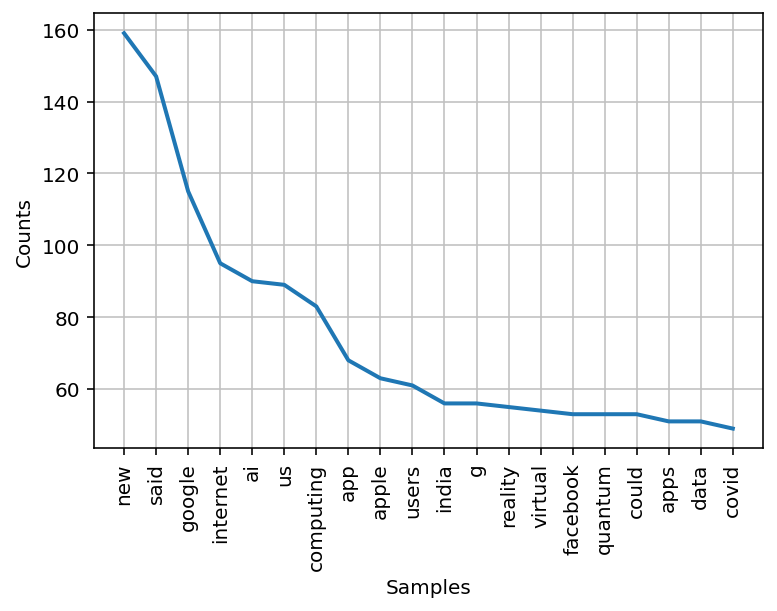

6961
<FreqDist with 6961 samples and 20857 outcomes>


In [15]:
# finding the words with the highest frequency (in general)
words = nltk.tokenize.word_tokenize(' '.join(df['text']))

count = set(words)
dic = nltk.FreqDist(words)
nltk.FreqDist(words).plot(20, cumulative=False)

# frequency of all words 
print(len(count))
print(dic)

## a lot of words in the text are not relevant to our analysis,  therefore we will match the df with 2 groups of well-known keywords

In [16]:
# reading the keywords from csv file (from the guardian)
keywords = pd.read_csv('keywords.csv')
kw1= list(keywords['keyword'].str.lower())
keywords.head()

,keyword
0,Aaron Swartz
1,Acer
2,Acta
3,Activate conference
4,Activision Blizzard


In [17]:
# another group of keywords obtained from the job description in indeed plateform (related to data science and AI)
# and some keywords are added manually
kw2 =['python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout', 'cassandra',
      'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala','c++',
      'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
 'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle',
'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react', 'scikit', 'powerbi',
      's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker','seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho', 
 'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce', 
 'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm','kubeflow',
      'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
 'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret',
'rmarkdown','leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer','amazon web services',
      'google cloud', 'sql server','NVIDIA ','Quantum','finance','coronavirus','Azure','Edge','Intelligence',
      'statistics', 'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly',
      'kpi', 'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 
      'hypothesis','salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory',
      'recommender','recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics',
 'chi', 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting', 
      'clustering', 'cluster', 'optimization', 'visualization', 'nlp', 'regression', 'logistic', 'nn',
      'cnn', 'glm', 'rnn', 'lstm', 'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian','Elon Musk'
 'bayes', 'random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning',
      'experimental design', 'satellite','Android',
 'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision',
      'dimensionality reduction', 'Zoom','Apple','Samsung'
 'text analytics', 'power bi',  'testing', 'chat bot', 'data mining']
kw2 = (' '.join(kw2).lower()).split(' ')

In [18]:
# add a column containing only the tech words (existing in kw_list)
def tech_text(text):
    tech_text = ' '.join([word.strip() for word in nltk.tokenize.word_tokenize(text) if word.strip() in  kw1 +kw2])
    return(tech_text)

df['tech_text'] =df['text'].apply(tech_text)
df[10:20]

,text,newspaper,country,date,author,tech_text
10,fukuoka softbank hawks japanese baseball team ...,inshort,india,2020-07-06,unkown,robots robots coronavirus
11,microsoftowned linkedin found copying contents...,inshort,india,2020-07-06,unkown,linkedin ios ios ios engineering
12,pm narendra modi saturday announced digital in...,inshort,india,2020-07-06,unkown,apps apps
13,apologized removed highlycited dataset named m...,inshort,india,2020-07-06,unkown,google
14,confederation india traders cait urged governm...,inshort,india,2020-07-06,unkown,network
15,privacyfocused search engine duckduckgo said s...,inshort,india,2020-07-06,unkown,services internet isps
16,alibaba fired zhao yan head livestreaming divi...,inshort,india,2020-07-06,unkown,
17,tesla ceo elon musk sunday said american philo...,inshort,india,2020-07-06,unkown,elon twitter
18,popular twitch streamer gamer byron bernstein ...,inshort,india,2020-07-06,unkown,twitch twitter twitch
19,facebook announced facebook instagram users us...,inshort,india,2020-07-06,unkown,facebook facebook instagram


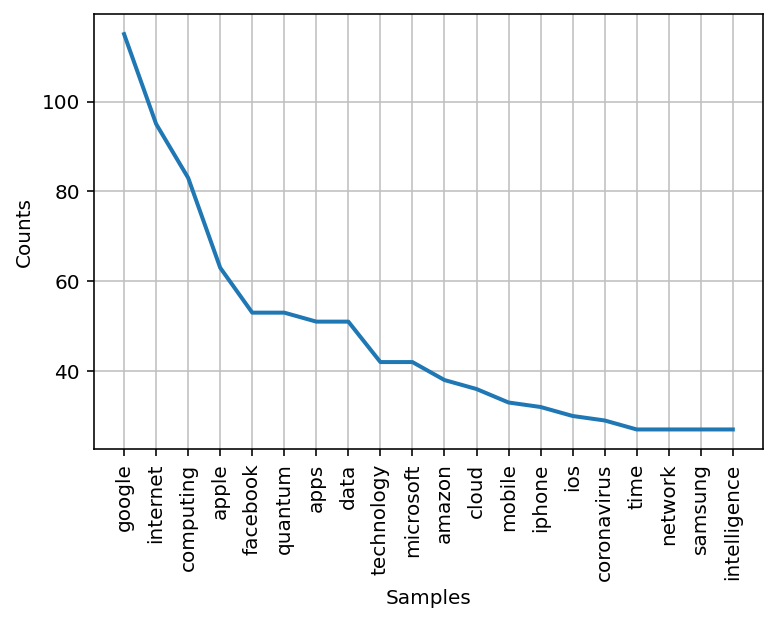

139


FreqDist({'google': 115, 'internet': 95, 'computing': 83, 'apple': 63, 'facebook': 53, 'quantum': 53, 'apps': 51, 'data': 51, 'technology': 42, 'microsoft': 42, ...})

In [19]:
# finding the tech words with the highest frequency 
words_tech = nltk.tokenize.word_tokenize(' '.join(df['tech_text']))

count_tech = set(words_tech)
dic_tech = nltk.FreqDist(words_tech)
nltk.FreqDist(words_tech).plot(20, cumulative=False)

# frequency of all words 
print(len(count_tech))
dic_tech

# Verctorizing the tech words:
we have 139 unique keywords, we will vectorize them using tf/idf technique, i.e each word will be encoded by a vector of length 139.

then we can apply the encoder on any new example


In [20]:
print('the are {} tech words in the data set'.format(len(words_tech)))
print('the are {} unique tech words in the data set'.format(len(set(words_tech))))

# the words c and r do not tokenized therefor we get a vertor of 122 instead 124

the are 1642 tech words in the data set
the are 139 unique tech words in the data set


# TF/IDF

 Term Frequency: This summarizes how often a given word appears within a document.
 
 Inverse Document Frequency: This downscales words that appear a lot across documents

In [21]:
# create the transform (using tf-idf)
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(list(df['tech_text']))
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'twitter': 128, 'facebook': 39, 'services': 109, 'engineering': 36, 'language': 63, 'intel': 55, 'time': 124, 'research': 102, 'robots': 103, 'coronavirus': 22, 'linkedin': 68, 'ios': 58, 'apps': 5, 'google': 47, 'network': 80, 'internet': 57, 'isps': 61, 'elon': 32, 'twitch': 127, 'instagram': 54, 'decision': 26, 'telecoms': 120, 'technology': 119, 'data': 25, 'processing': 94, 'satellite': 106, 'gmail': 46, 'spam': 113, 'android': 2, 'malware': 72, 'testing': 122, 'apple': 4, 'mobile': 75, 'games': 44, 'reduction': 100, 'linux': 69, 'machine': 71, 'learning': 65, 'design': 29, 'computer': 20, 'software': 111, 'finance': 41, 'cluster': 18, 'tree': 125, 'cnn': 19, 'natural': 78, 'deep': 27, 'amazon': 0, 'pc': 87, 'playstation': 90, 'laptops': 64, 'broadband': 12, 'samsung': 105, 'support': 118, 'energy': 35, 'intelligence': 56, 'quantum': 97, 'email': 33, 'uber': 129, 'smartphones': 110, 'whatsapp': 133, 'youtube': 137, 'web': 132, 'hacking': 49, 'experimental': 38, 'iphone': 60, 'han

In [22]:
# encode all documents (rows) using the vectorizer
vectors =[]
for  item in df['tech_text']:
    vectors.append(vectorizer.transform([item]).toarray()[0])
len(vectors)

1570

In [23]:
# the encoded vectors of the dataset as df

encoded_df = pd.DataFrame(vectors)
encoded_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### now our documents are tokenized as vectors, and this allows to encode a new document 

In [24]:
# example
doc= 'facebook facebook COMPUTING computing  apple facebook fruit'

In [25]:
vectorizer.transform([doc]).toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.25995503,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.47366482, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.84146599,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## now we will group the df by the newspaper and use our encoder to see the most frequent word each newspaper is using 

In [26]:
df_cat = df.groupby('newspaper')['tech_text'].apply(lambda x: ' '.join(x)).reset_index()
df_cat

,newspaper,tech_text
0,MIT,technology deep technology robots resear...
1,abc,internet apps internet facebook r...
2,bbc_bussiness,support energy
3,bbc_tech,language twitch machine twitter processing...
4,cnet,facebook instagram apple cluster time ...
5,gadgets,amazon pc playstation amazon laptops broadb...
6,google_news,prediction intelligence intelligence intelli...
7,inshort,twitter twitter facebook services facebook eng...
8,linux,linux machine learning design linux design ...
9,reuters,telecoms network telecoms technology network a...


### let us encode the text of yahoo as an example

In [41]:
# yahoo tech word 
yahoo_text = list(df_cat[df_cat['newspaper']=='yahoo']['tech_text'])[0]
yahoo_text



'amazon amazon    facebook google twitter facebook google twitter  software software  apple apps apple apps microsoft microsoft microsoft microsoft  uber   internet internet uber internet internet facebook facebook google uber google  whatsapp whatsapp spotify spotify  server facebook facebook   youtube  playstation mobile playstation mobile   iphone iphone   apps apps   uber facebook  ios apple ios apple    experimental coronavirus uber lyft time uber lyft  coronavirus google mobile apps data google google facebook oracle instagram  pc coronavirus coronavirus energy pc data pc telecoms pc pc time decision nokia pc time   decision   forecasting network  coronavirus  decision engineering   coronavirus support data google data google google'

In [42]:
# the encoded vector
yahoo_vec = vectorizer.transform([yahoo_text]).toarray()[0]
yahoo_vec

array([0.09612431, 0.        , 0.        , 0.        , 0.16987011,
       0.22667003, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.29227753, 0.        , 0.        ,
       0.1768447 , 0.17730667, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05910222, 0.06408679, 0.        , 0.07085042, 0.36657601,
       0.        , 0.        , 0.        , 0.0748069 , 0.        ,
       0.        , 0.        , 0.37554186, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05451599,
       0.        , 0.        , 0.1493682 , 0.09882042, 0.        ,
       0.09676423, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.14170085, 0.        , 0.        , 0.        , 0.18534

In [37]:
def max_word(text):
    # function to return the max word in a text depending on the vectorizer
    dic = vectorizer.vocabulary_
    max_index =vectorizer.transform([text]).toarray()[0].argmax()
    word = list(dic.keys())[list(dic.values()).index(max_index)]
    return word

In [43]:
# they use facebook the most :)
max_word(yahoo_text)

'google'

In [44]:
# now we add a column to show the max word used in each website
df_cat['max'] = df_cat['tech_text'].apply(lambda x:max_word(x))

In [45]:
df_cat

,newspaper,tech_text,max
0,MIT,technology deep technology robots resear...,technology
1,abc,internet apps internet facebook r...,facebook
2,bbc_bussiness,support energy,energy
3,bbc_tech,language twitch machine twitter processing...,software
4,cnet,facebook instagram apple cluster time ...,hacking
5,gadgets,amazon pc playstation amazon laptops broadb...,samsung
6,google_news,prediction intelligence intelligence intelli...,computing
7,inshort,twitter twitter facebook services facebook eng...,google
8,linux,linux machine learning design linux design ...,linux
9,reuters,telecoms network telecoms technology network a...,network


In [ ]:
############################ done

In [46]:
#df_cat1 = df.groupby(['newspaper'])[['tech_text']].agg(lambda x: ' '.join(x))#.apply(lambda x: ' '.join(x)).reset_index()
#df_cat1

In [47]:
#df_cat1['newspaper']=sorted(df['newspaper'].unique())
#df_cat1

In [ ]:
#df_cat1[df_cat1['newspaper']=='linux']['tech_text'][0]

In [ ]:
#len(df[df['newspaper']=='scitechdaily']['tech_text'])

In [ ]:
#df[df['newspaper']=='yahoo']['tech_text']

In [ ]:
#len(kw1+kw2)